## Function 6

1. Load the provided initial data.
2. Visualize the current data to understand its structure.
3. Fit a Gaussian Process (GP) surrogate model.
4. Use Bayesian optimization to suggest the next best point(s).

In [1]:
# update data weekly
import numpy as np
import os

# Function number (update this as needed)
function_id = 6  # change for f2, f3, etc.

# Load original data
inputs_path = f'function_{function_id}/initial_inputs.npy'
outputs_path = f'function_{function_id}/initial_outputs.npy'
inputs = np.load(inputs_path)
outputs = np.load(outputs_path)

# Load new data (replace this with your actual new submissions)
# Example: new 2D point with corresponding output
# week1:0.95774	0.931871	0.016523	0.045613	0.892819	and -3.335397612
# week2:0.223041	0.290350	0.330742	0.961656	0.961656	and -1.657473918
# week3_1: 0.828186	0.246926	0.772552	0.793997	0.016401 and -0.8039002352971817
# week3_2f: 0.223041	0.29035	0.300742	0.971656	0.004911	and -0.985880297
# w4-1t: 0.499012	0.391740	0.385873	0.711739	0.179028	and -0.45696084
# w4-2f: 0.466185	0.388275	0.433196	0.667024	0.139662	and -0.504732244
# w5-1t: 0.494619	0.397923	0.395404	0.749267	0.207137	and -0.499091038
# w5-2f: 0.506365	0.396620	0.295650	0.677945	0.124060	and -0.560570402114821
# w6-1t: 0.582972	0.345556	0.420619	0.657778	0.196183  and -0.667905644447242
# w6-2f: 0.499012	0.391740	0.395873	0.721739	0.179928 and -0.536274109847596
# w7-1t: 0.504008	0.482053	0.406429	0.616392	0.352119 and -0.777177838374404
# w7-2f: 0.499012	0.390740	0.384873	0.710739	0.178028 and -0.500530968314393
# w8-1t: 0.490012	0.391740	0.384873	0.720739	0.178028 and -0.85195407283813
# w8-2f: 0.499012	0.391740	0.385873	0.711739	0.169028 and -0.538352542098741
# w9-1t: 0.499012	0.390740	0.384873	0.700739	0.176028 and -0.572842586281246
# W9-2f: 0.957740	0.931871	0.978806	0.045613	0.004911 and -2.228289421
# w10-1t: 0.499112	0.392740	0.385873	0.711739	0.178128 and -0.438646382179378
# w10-2f: 0.499512	0.393740	0.385873	0.712739	0.188128 and 

new_inputs = np.array([[0.499512, 0.393740, 0.385873, 0.712739, 0.188128]])
new_outputs = np.array([-0.492113082])

# Concatenate new data to existing
updated_inputs = np.vstack([inputs, new_inputs])
updated_outputs = np.concatenate([outputs, new_outputs])
print("updated_inputs shape:", updated_inputs.shape)
print("updated_outputs shape:", updated_outputs.shape)
# Optionally: save backup copies before overwriting
np.save(f'function_{function_id}/backup_inputs.npy', inputs)
np.save(f'function_{function_id}/backup_outputs.npy', outputs)

# Save updated files
np.save(inputs_path, updated_inputs)
np.save(outputs_path, updated_outputs)

print("Updated data saved.")

updated_inputs shape: (39, 5)
updated_outputs shape: (39,)
Updated data saved.


In [3]:
# import numpy as np

# # Load the original data
# inputs_f6 = np.load('function_6/initial_inputs.npy')
# outputs_f6 = np.load('function_6/initial_outputs.npy')
# print("Updated output at index 29:", outputs_f6[29])
# print("Updated output at index 30:", outputs_f6[30])
# # # Remove the last row from both
# # inputs_f6 = inputs_f6[:-1]
# # outputs_f6 = outputs_f6[:-1]

# # # Example: update the value of the output at index 30
# # outputs_f6[30] = -0.777177838374404  

# # # # # Optional: save the updated arrays
# # np.save('function_6/initial_inputs.npy', inputs_f6)
# # np.save('function_6/initial_outputs.npy', outputs_f6)

# # Confirm changes
# print("Updated inputs shape:", inputs_f6.shape)
# print("Updated outputs shape:", outputs_f6.shape)
# # print("Updated output at index 29:", outputs_f6[29])
# # print("Updated output at index 30:", outputs_f6[30])
# # print("Updated output at index 31:", outputs_f6[31])

Updated output at index 29: -0.536274109847596
Updated output at index 30: -0.777177838374404
Updated inputs shape: (36, 5)
Updated outputs shape: (36,)


Inputs: [[0.7281861  0.15469257 0.73255167 0.69399651 0.05640131]
 [0.24238435 0.84409997 0.5778091  0.67902128 0.50195289]
 [0.72952261 0.7481062  0.67977464 0.35655228 0.67105368]
 [0.77062024 0.11440374 0.04677993 0.64832428 0.27354905]
 [0.6188123  0.33180214 0.18728787 0.75623847 0.3288348 ]
 [0.78495809 0.91068235 0.7081201  0.95922543 0.0049115 ]
 [0.14511079 0.8966846  0.89632223 0.72627154 0.23627199]
 [0.94506907 0.28845905 0.97880576 0.96165559 0.59801594]
 [0.12572016 0.86272469 0.02854433 0.24660527 0.75120624]
 [0.75759436 0.35583141 0.0165229  0.4342072  0.11243304]
 [0.5367969  0.30878091 0.41187929 0.38822518 0.5225283 ]
 [0.95773967 0.23566857 0.09914585 0.15680593 0.07131737]
 [0.6293079  0.80348368 0.81140844 0.04561319 0.11062446]
 [0.02173531 0.42808424 0.83593944 0.48948866 0.51108173]
 [0.43934426 0.69892383 0.42682022 0.10947609 0.87788847]
 [0.25890557 0.79367771 0.6421139  0.19667346 0.59310318]
 [0.43216593 0.71561781 0.3418191  0.70499988 0.61496184]
 [0.78

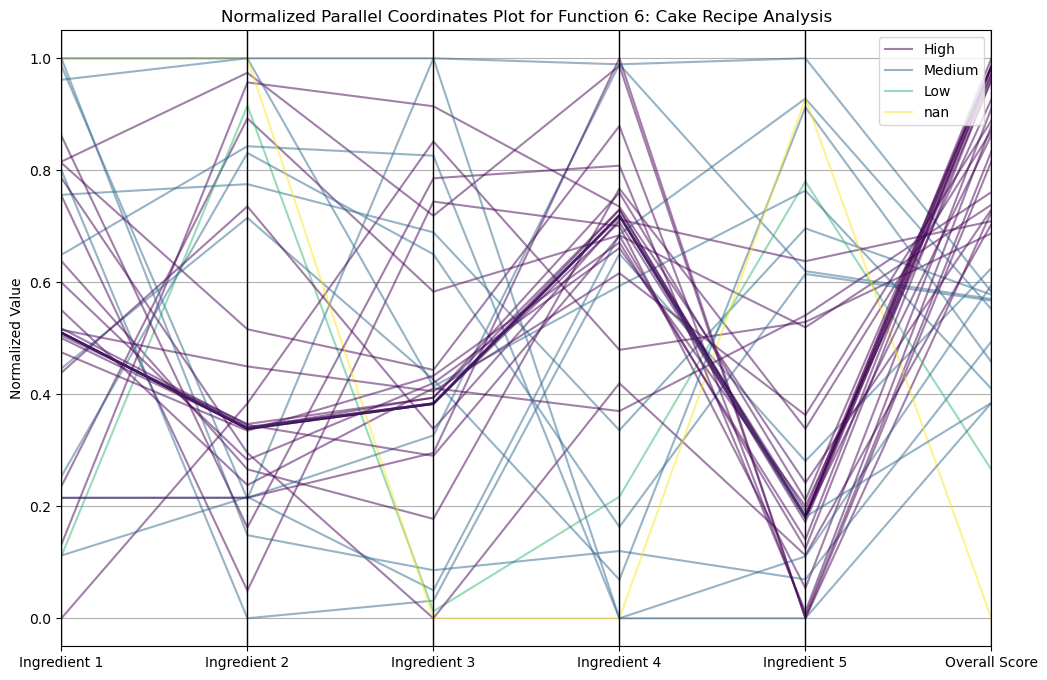

Suggested next best guess (ingredients): [0.54312599 0.49945784 0.44035521 0.59713446 0.33279789]
Predicted overall score at next suggested input: -1.1930181312164598e-59 ± 1.0
Suggested next best input (6 decimals): ['0.543126', '0.499458', '0.440355', '0.597134', '0.332798']


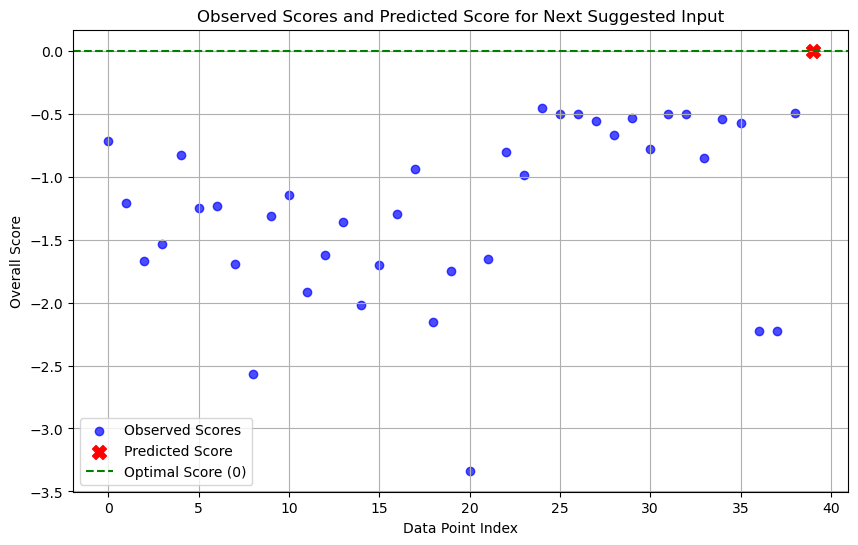

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize

# Load initial data for Function 6
inputs_f6 = np.load('function_6/initial_inputs.npy')
outputs_f6 = np.load('function_6/initial_outputs.npy')

# # Count negative outputs
# num_negative = np.sum(outputs_f6 < 0)
# # Check if negative outputs constitute the majority
# if num_negative > len(outputs_f6) / 2:
#    # print(f"Majority are negative: {num_negative}/{len(outputs)}")
#    outputs_f6 = -outputs_f6

print("Inputs:", inputs_f6)
print("Outputs:", outputs_f6)

# Prepare data for parallel coordinates plot
feature_columns = [f'Ingredient {i+1}' for i in range(inputs_f6.shape[1])]
data_f6 = pd.DataFrame(inputs_f6, columns=feature_columns)
data_f6['Overall Score'] = outputs_f6

# Apply Min-Max normalization for clear visualization
scaler = MinMaxScaler()
data_f6_normalized = pd.DataFrame(scaler.fit_transform(data_f6), columns=data_f6.columns)

# Categorize scores for visualization
bins = np.linspace(data_f6_normalized['Overall Score'].min(), data_f6_normalized['Overall Score'].max(), 4)
data_f6_normalized['Score Level'] = pd.cut(data_f6_normalized['Overall Score'], bins, labels=['Low', 'Medium', 'High'])

# Parallel coordinates plot with normalized data
plt.figure(figsize=(12, 8))
parallel_coordinates(data_f6_normalized, class_column='Score Level', colormap='viridis', alpha=0.5)
plt.title('Normalized Parallel Coordinates Plot for Function 6: Cake Recipe Analysis')
plt.ylabel('Normalized Value')
plt.grid(True)
plt.show()

# Gaussian Process Regression Model
gp = GaussianProcessRegressor(kernel=Matern(nu=2.5), n_restarts_optimizer=10)
gp.fit(inputs_f6, outputs_f6)

# Upper Confidence Bound (UCB) for next best guess
def ucb(x, gp, kappa=2.576):
    mean, std = gp.predict(x.reshape(1, -1), return_std=True)
    return mean - kappa * std  # Minimize this value to approach zero

# Optimization bounds based on observed data
bounds = [(np.min(inputs_f6[:, i]), np.max(inputs_f6[:, i])) for i in range(inputs_f6.shape[1])]

# Find next best guess using UCB
result = minimize(ucb,
                  x0=np.mean(inputs_f6, axis=0),
                  args=(gp,),
                  bounds=bounds,
                  method='L-BFGS-B')

next_best_guess = result.x
print("Suggested next best guess (ingredients):", next_best_guess)

# Predict the output score at the next suggested input
predicted_score, predicted_std = gp.predict(next_best_guess.reshape(1, -1), return_std=True)
print("Predicted overall score at next suggested input:", predicted_score[0], "±", predicted_std[0])
print("Suggested next best input (6 decimals):", [f"{x:.6f}" for x in next_best_guess])
# Scatter plot of the observed data and the new prediction
plt.figure(figsize=(10, 6))
plt.scatter(range(len(outputs_f6)), outputs_f6, label='Observed Scores', color='blue', alpha=0.7)
plt.scatter(len(outputs_f6), predicted_score, label='Predicted Score', color='red', s=100, marker='X')
plt.axhline(y=0, color='green', linestyle='--', label='Optimal Score (0)')
plt.xlabel('Data Point Index')
plt.ylabel('Overall Score')
plt.title('Observed Scores and Predicted Score for Next Suggested Input')
plt.legend()
plt.grid(True)
plt.show()

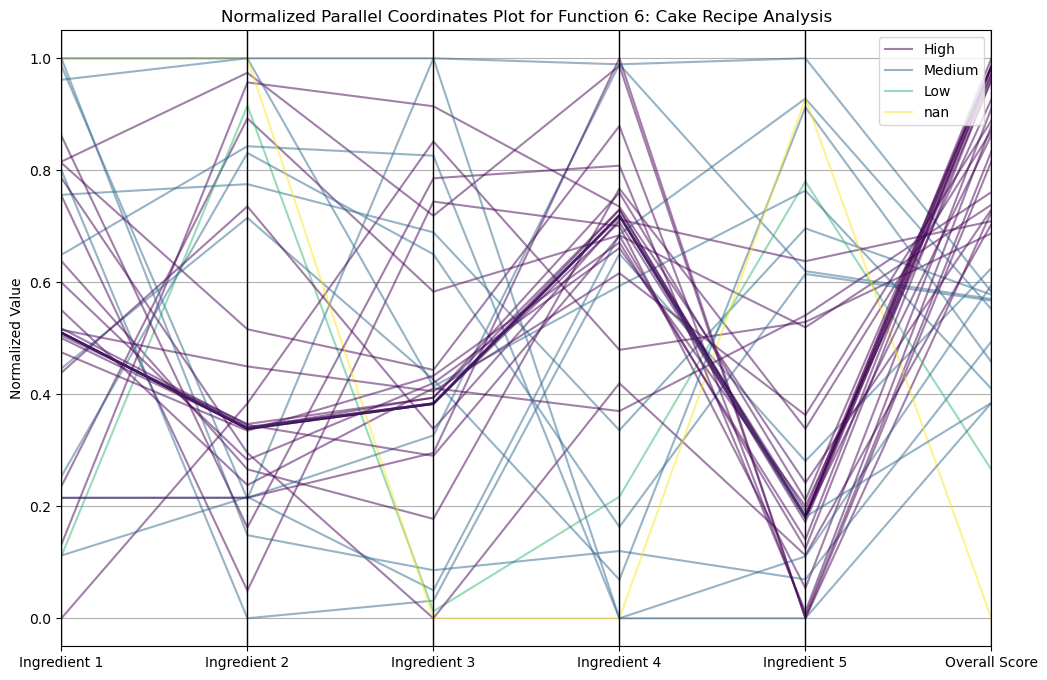

Suggested next best guess (ingredients): [0.54312599 0.49945784 0.44035521 0.59713446 0.33279789]
Suggested next best input (6 decimals): ['0.543126', '0.499458', '0.440355', '0.597134', '0.332798']
Predicted overall score at next suggested input: 0.0 ± 1.0


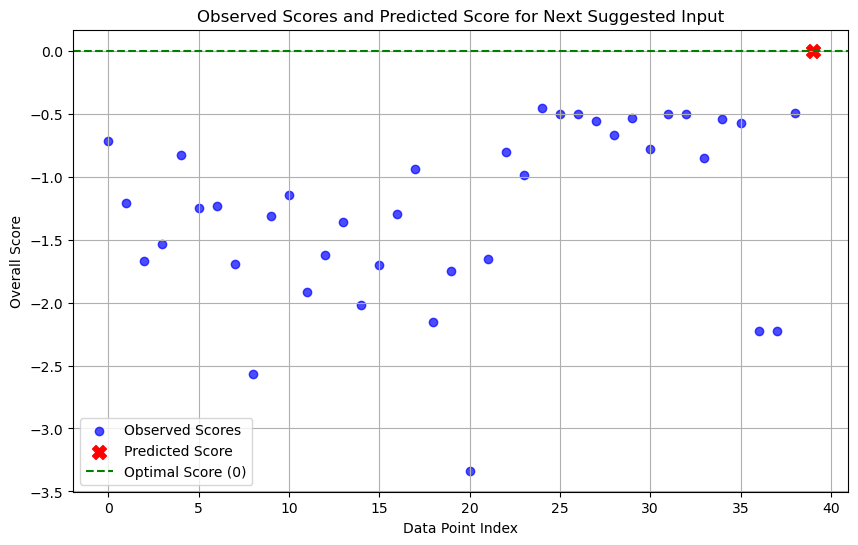

In [5]:
# used this for submission

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize

# Load initial data for Function 6
inputs_f6 = np.load('function_6/initial_inputs.npy')
outputs_f6 = np.load('function_6/initial_outputs.npy')

# print("Inputs:", inputs_f6)
# print("Outputs:", outputs_f6)

# Prepare data for parallel coordinates plot
feature_columns = [f'Ingredient {i+1}' for i in range(inputs_f6.shape[1])]
data_f6 = pd.DataFrame(inputs_f6, columns=feature_columns)
data_f6['Overall Score'] = outputs_f6

# Apply Min-Max normalization for clear visualization
scaler = MinMaxScaler()
data_f6_normalized = pd.DataFrame(scaler.fit_transform(data_f6), columns=data_f6.columns)

# Categorize scores for visualization
bins = np.linspace(data_f6_normalized['Overall Score'].min(), data_f6_normalized['Overall Score'].max(), 4)
data_f6_normalized['Score Level'] = pd.cut(data_f6_normalized['Overall Score'], bins, labels=['Low', 'Medium', 'High'])

# Parallel coordinates plot with normalized data
plt.figure(figsize=(12, 8))
parallel_coordinates(data_f6_normalized, class_column='Score Level', colormap='viridis', alpha=0.5)
plt.title('Normalized Parallel Coordinates Plot for Function 6: Cake Recipe Analysis')
plt.ylabel('Normalized Value')
plt.grid(True)
plt.show()

# Gaussian Process Regression Model
gp = GaussianProcessRegressor(kernel=Matern(nu=2.5), n_restarts_optimizer=10)
gp.fit(inputs_f6, outputs_f6)

# Define objective to minimize absolute predicted score (closest to zero)
def objective_closest_to_zero(x, gp):
    mean, _ = gp.predict(x.reshape(1, -1), return_std=True)
    return np.abs(mean)

# Optimization bounds based on observed data
bounds = [(np.min(inputs_f6[:, i]), np.max(inputs_f6[:, i])) for i in range(inputs_f6.shape[1])]

# Find next best guess aiming for output closest to zero
result = minimize(objective_closest_to_zero,
                  x0=np.mean(inputs_f6, axis=0),
                  args=(gp,),
                  bounds=bounds,
                  method='L-BFGS-B')

next_best_guess = result.x
print("Suggested next best guess (ingredients):", next_best_guess)
print("Suggested next best input (6 decimals):", [f"{x:.6f}" for x in next_best_guess])
# Predict the output score at the next suggested input
predicted_score, predicted_std = gp.predict(next_best_guess.reshape(1, -1), return_std=True)
print("Predicted overall score at next suggested input:", predicted_score[0], "±", predicted_std[0])

# Scatter plot of the observed data and the new prediction
plt.figure(figsize=(10, 6))
plt.scatter(range(len(outputs_f6)), outputs_f6, label='Observed Scores', color='blue', alpha=0.7)
plt.scatter(len(outputs_f6), predicted_score, label='Predicted Score', color='red', s=100, marker='X')
plt.axhline(y=0, color='green', linestyle='--', label='Optimal Score (0)')
plt.xlabel('Data Point Index')
plt.ylabel('Overall Score')
plt.title('Observed Scores and Predicted Score for Next Suggested Input')
plt.legend()
plt.grid(True)
plt.show()